In [3]:
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

# Load the cleaned dataset
data = pd.read_csv('/work/festusedward-n/Dataset_TZ_KM/combined_mouse_keystroke_imputed_cleaned.csv')

# 1. Prepare features (X) and target (y)
X = data.drop(columns=['user_id', 'timestamp', 'mouse_id', 'keystroke_id', 'label'], errors='ignore')

# 2. Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train a One-Class SVM on the genuine data (assume 0 represents genuine behavior)
genuine_data = data[data['label'] == 0]  # Extract genuine data
X_genuine = genuine_data.drop(columns=['user_id', 'timestamp', 'mouse_id', 'keystroke_id', 'label'], errors='ignore')
X_genuine_scaled = scaler.transform(X_genuine)

# 4. Initialize and train the One-Class SVM model (for anomaly detection)
model_ocsvm = OneClassSVM(kernel='rbf', nu=0.1, gamma='scale')
model_ocsvm.fit(X_genuine_scaled)  # Train using only genuine data

# 5. Predict on the entire dataset (including both genuine and attack data)
y_pred = model_ocsvm.predict(X_scaled)

# Convert predictions: 1 for normal, -1 for anomalous
y_pred_normalized = [1 if pred == 1 else 0 for pred in y_pred]

# 6. Evaluate model performance on the combined dataset
print("Classification Report:")
print(classification_report(data['label'], y_pred_normalized))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(data['label'], y_pred_normalized)
print(conf_matrix)


ValueError: could not convert string to float: 'y'

In [2]:
import os
print(os.listdir('/work/festusedward-n/Dataset_TZ_KM'))


['combined_with_simulated_attacks.csv', 'combined_mouse_keystroke_imputed_cleaned.csv', 'mouse_modified_trimmed_clean.csv', 'datapreparation.ipynb', 'one_class_svm_genuine_model.pkl', 'simulated_attack_dataset.csv', 'combined_data_10.csv', 'Keystroke_preprocessing.ipynb', 'imputed_keystroke_data.csv', 'logger_keystrokelog.csv', 'logger_mouseactionlog_modified.csv', 'synthetic_attack_data_5.csv', 'synthetic_attack_data_30.csv', 'cleaned_keystroke_data.csv', 'mouse_modified_trimmed.csv', 'combined_user_features1.csv', 'one_class_svm_genuine_model_tuned.pkl', 'mouse_modified.csv', 'mouse_modified_trimmed_clean_imputed.csv', 'combined_imputed_mouse_keystroke.csv', 'logger_keystrokelog_modified.csv', 'one_class_svm_genuine_model_normalized.pkl', 'synthetic_attack_data_10.csv', '.ipynb_checkpoints', 'combined_data_5.csv', 'logger_mouseactionlog.csv', 'combined_data_30.csv', 'generate_attack_mousedata.ipynb']


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Load the combined dataset
combined_data = pd.read_csv('/work/festusedward-n/Dataset_TZ_KM/combined_mouse_keystroke_imputed_cleaned.csv')

# Step 1: Separate features and target variables
X = combined_data.drop(columns=['user_id', 'timestamp', 'mouse_id', 'keystroke_id', 'label'], errors='ignore')
y = combined_data['label']

# Step 2: Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns

# Encode each categorical column
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Step 3: Handle missing values (if necessary)
X = X.fillna(X.mean())

# Step 4: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 6: Train the model using XGBoost
model_xgb = xgb.XGBClassifier(random_state=42)
model_xgb.fit(X_resampled, y_resampled)

# Step 7: Predict using the trained model
y_pred = model_xgb.predict(X_scaled)

# Step 8: Evaluate the model
print("Classification Report:")
print(classification_report(y, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y, y_pred)
print(conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Attack'], yticklabels=['Genuine', 'Attack'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix.png')
plt.savefig('confusion_matrix.pdf')
plt.show()

# Plotting the ROC Curve
fpr, tpr, _ = roc_curve(y, model_xgb.predict_proba(X_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.savefig('roc_curve.png')
plt.savefig('roc_curve.pdf')
plt.show()

# Plotting the Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y, model_xgb.predict_proba(X_scaled)[:, 1])
average_precision = average_precision_score(y, model_xgb.predict_proba(X_scaled)[:, 1])

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.savefig('precision_recall_curve.png')
plt.savefig('precision_recall_curve.pdf')
plt.show()


KeyError: 'label'

In [6]:
# Print the column names to check if 'label' exists
print(combined_data.columns)


Index(['keystroke_id', 'key', 'keystroke_action', 'rhythm', 'dwell_time',
       'flight_time', 'up_down_time', 'session_duration', 'user_id',
       'mouse_id', 'mouse_action', 'coordinates', 'button', 'delta',
       'distance', 'speed'],
      dtype='object')


In [7]:
# Step 1: Assuming the combined_data contains both genuine and attack data, we will label the data
# First, initialize all rows to be labeled as genuine (0)
combined_data['label'] = 0

# Step 2: Assuming you have attack data separately or a way to identify the attack data, 
# label the attack data as 1. For example, if attack data has a separate 'user_id' or unique indicator:

# If the attack data is known or stored separately, you can use:
# combined_data.loc[combined_data['user_id'].isin(attack_data['user_id']), 'label'] = 1

# If the attack data is mixed into the combined dataset and you don't have a clear way to distinguish,
# you may have to rely on other clues, for instance checking specific columns that signify attack behavior.

# Step 3: Recheck the combined dataset after adding labels
print(combined_data[['label']].head())

# If the dataset already contains the attack data within, you could manually assign labels like:
# For example, if you know certain ids belong to attack, just do:
# combined_data.loc[combined_data['keystroke_id'].isin(attack_keystroke_ids), 'label'] = 1

# Step 4: Save the modified combined dataset
combined_data.to_csv('combined_mouse_keystroke_imputed_cleaned_with_labels.csv', index=False)

# Optional: Check the shape and first few rows of the data
print(f"Modified Data Shape: {combined_data.shape}")
print("First few rows with labels:", combined_data.head())


   label
0      0
1      0
2      0
3      0
4      0
Modified Data Shape: (60, 17)
First few rows with labels:    keystroke_id key keystroke_action  rhythm  dwell_time  flight_time  \
0        3067.0   1          release   0.000    0.152503     1.788202   
1        3146.0   7          release   0.000    0.111307     1.114417   
2        4997.0   6            press   0.100    0.100000     0.000000   
3        5027.0   9            press   0.101    0.101000     0.000000   
4        5348.0   y            press   0.093    0.093000     0.000000   

   up_down_time  session_duration  user_id  mouse_id mouse_action coordinates  \
0      1.788202         13.830218        1   64268.0         move     577,109   
1      1.114417         13.830218        2   63980.0      pressed   (26, 279)   
2      0.000000          4.274000       19   80136.0         move     671,438   
3      0.000000          2.280000       21   80876.0         move     616,496   
4      0.000000          1.385000       24  

In [10]:
# Check the class distribution of the target variable
print(y.value_counts())


label
0    60
Name: count, dtype: int64


One-Class SVM Classification Report (Genuine Data):
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        55

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



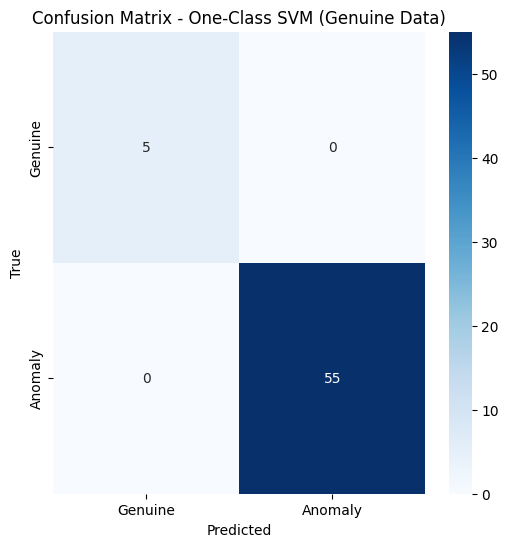

['scaler.pkl']

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import OneClassSVM
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the combined dataset with labels
combined_data = pd.read_csv('combined_mouse_keystroke_imputed_cleaned_with_labels.csv')

# Step 2: Filter genuine data only (label == 0)
genuine_data = combined_data[combined_data['label'] == 0]

# Step 3: Separate features (X) and target (y) for One-Class SVM
X = genuine_data.drop(columns=['user_id', 'timestamp', 'mouse_id', 'keystroke_id', 'label'], errors='ignore')
y = genuine_data['label']

# Step 4: Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()

# Identify categorical columns (which have object data types)
categorical_columns = X.select_dtypes(include=['object']).columns

# Apply LabelEncoder for each categorical column
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Step 5: Scale the features (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Train a One-Class SVM model
model_ocsvm = OneClassSVM(kernel='rbf', nu=0.1, gamma='scale')
model_ocsvm.fit(X_scaled)

# Step 7: Predict using the trained model
y_pred_train = model_ocsvm.predict(X_scaled)  # 1 for inliers (genuine), -1 for outliers (anomalies)

# Step 8: Evaluate the model (classification report and confusion matrix)
print("One-Class SVM Classification Report (Genuine Data):")
print(classification_report(y_pred_train, y_pred_train))  # Here we use predictions against themselves

# Step 9: Plot the confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_pred_train, y_pred_train), annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Anomaly'], yticklabels=['Genuine', 'Anomaly'])
plt.title('Confusion Matrix - One-Class SVM (Genuine Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Save the model and scaler
import joblib
joblib.dump(model_ocsvm, 'one_class_svm_genuine_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
